# Introduction

As the technology to create electric-powered vehicles continues to evolve, so does the desire to own one. Ritchie (2024) discusses the global trends in electric vehicle sales, showing that the percentage of electric vehicles in the United States has increased from 2% in 2020 to 10% in 2023. With this growing shift toward electric vehicles, I aim to explore whether one of the major issues with gas-powered vehicles is reduced when switching to electric. Specifically, particulate matter (PM2.5) has been identified as the leading air pollutant emitted by gas-powered vehicles, and it can have various harmful effects on human health (Ilenič et al., 2024).

My goal is to analyze the relationship between the number of electric and gas
vehicles across U.S. states, focusing on whether an increase in one vehicle type correlates with a decrease in the other. Additionally, I will examine whether changes in vehicle fuel types have any measurable effect on air quality in these states, exploring the potential correlation between the prevalence of electric vehicles and improvements in air quality.



# Literature Review

McDuffie et al. (2021) found that particulate matter (PM2.5) is one of the world’s leading environmental health risks, attributing 4 million deaths in 2019 to PM2.5 exposure. Further, in 2024, Ilenič et al. found that those most vulnerable to PM2.5 are individuals who do not commute by car but instead walk or bike to their destinations. While PM2.5 does pose a significant health risk, one potential solution could be electric vehicles (EVs), which an MIT report identified. While electric vehicles still contribute to overall emissions, their emissions are comparatively lower than those of gas-powered vehicles (Moseman & Paltsev, 2022).

As previously mentioned, McDuffie et al. (2021) found that 91% of the global population is exposed to PM2.5 levels exceeding 10 μg/m³ (micrograms per cubic meter), the level recommended by the World Health Organization (WHO), and that 4 million deaths can be attributed to exposure to PM2.5. Of these deaths, “27.3% of total PM2.5 attributable deaths could be avoided by eliminating emissions from fossil-fuel combustion” (McDuffie et al., 2021). Furthermore, non-accidental deaths were noted to increase by 6% per 10 μg/m³ increase in PM2.5 levels (Ilenič et al., 2024). Utilizing sensors mounted on cyclists, Ilenič et al. (2024) identified that those who commute by car are especially vulnerable, finding that in 45.21% of all recorded cases, participants exceeded annual WHO limits for PM2.5 exposure. MIT’s study on the lifetime emissions of electric vehicles compared to combustion engine vehicles shows a result that could benefit global air quality, particularly for those who commute without cars. Moseman and Paltsev (2022) note that the Department of Energy found that electric vehicles produce 3,932 lbs. of CO2, compared to the 11,435 lbs. produced by combustion vehicles.

The studies discussed highlight significant contributions of particulate matter (PM2.5) from various sources, particularly from vehicles, and their associated health risks. While McDuffie et al. (2021) identify fossil fuel combustion as a major contributor to global PM2.5 levels, the research does not delve deeply into the long-term effects of transitioning to electric vehicles (EVs) on air quality and public health, particularly in regions with high traffic congestion or limited EV adoption. Similarly, while Ilenič et al. (2024) emphasize the vulnerability of pedestrians and cyclists to PM2.5 exposure, their study primarily focuses on urban areas and does not consider rural or less densely populated environments, where PM2.5 sources may differ. Moreover, although the MIT report by Moseman and Paltsev (2022) presents valuable insights into the comparative emissions of electric vehicles and gas-powered vehicles, it lacks a detailed analysis of the broader environmental and health impacts of EV production, including battery manufacturing, which could offset some of the benefits.



# Data Assembly

In order to answer the question of whether an increase of EVs or decrease of combustion vehicles resulted in a decrease in a state's average PM 2.5 level, I needed to find sources to allow me to compare the two. I found two datasets, the DOE EV registration dataset and the EPAs air quality dataset. Upon initial inspection of the datasets, both held information that I wanted to use, but were being stored in different formats that required cleaning in order to eventually combine them into a single dataset.

When I initially was cleaning my data and completing all other portions of the project, I had different notebooks for each portion I was trying to complete. This, and because I wanted to make sure I had saved all data locally, is why I ended up writing to multiple CSVs throughout the project.

## DOE EV Dataset

Initially, I focused on obtaining and cleaning the vehicle registration data, which required web scraping because the data was housed in tables displayed on the web page. I knew I would need to focus on converting the data into a usable format. After scraping the data, I repeated the process for each year's dataset and saved the reports in CSV format. Once the data was in CSV format, I added a "Year" column to match each report's year and then merged all the files into a single CSV.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import csv

In [ ]:
state_veh_registration = requests.get('https://afdc.energy.gov/vehicle-registration?year=2016')

In [ ]:
bs_state_veh_registration = BeautifulSoup(state_veh_registration.text, 'html.parser')

After using the module information to. pull the requested page and then use BeautifulSoup to parse the page, I was able to pull all items after going through some trial and error of seeing exactly which table information on the page neaded to be pulled. the page contained a header above the table that needed to be narrowed out of the table extraction.

In [ ]:
table = bs_state_veh_registration.find('table', {'id': 'vehicle_registration'})

In [ ]:
tbody = table.find('tbody')

In [ ]:
manual_headers = [
    "state", "Electric", "PHEV",
    "HEV", "Biodiesel", "Flex",
    "CNG", "Propane", "Hydrogen", "Methanol",
    "Gas", "Diesel", "Unknown"
]

Because each table was saved in a different dropdown on the webpage, I decided to create a CSV for each year that would eventually be combined into a single EV data CSV. In order to create new CSVs for each, I had chat GPT help me write a simple for loop that pulled the data based on the headers I passed to it. I had to run this for each year, I had to update the link above and update the year at the end of the CSV name to ensure there was no overwriting when running.

In [ ]:
with open('veh_reg_2016.csv', 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)

    # Write the manually defined headers to the CSV
    writer.writerow(manual_headers)

    # Step 8: Iterate over all tbody rows and write each row's data
    for row in tbody.find_all('tr'):
        # Extract the data from each <td> in the row
        column_data = [td.get_text(strip=True) for td in row.find_all('td')]

        # Only write rows that contain data (avoid empty rows)
        if column_data:
            writer.writerow(column_data)

print("Data has been written to 'veh_reg_2016.csv'.")

Data has been written to 'veh_reg_2016.csv'.


In [ ]:
df_2016 = pd.read_csv('veh_reg_2016.csv')
df_2017 = pd.read_csv('veh_reg_2017.csv')
df_2018 = pd.read_csv('veh_reg_2018.csv')
df_2019 = pd.read_csv('veh_reg_2019.csv')
df_2020 = pd.read_csv('veh_reg_2020.csv')
df_2021 = pd.read_csv('veh_reg_2021.csv')
df_2022 = pd.read_csv('veh_reg_2022.csv')
df_2023 = pd.read_csv('veh_reg_2023.csv')

After Writing all the tables to CSV, I then converted it to DF format so that I could manipulate the table easier. After saving each as a CSV, I then added a year column to each DF for tracking the numbers for each year and to be able to have a column that lets me relate it to my EPA dataset.

In [ ]:
df_2016.insert(0, "Year", 2016)
df_2017.insert(0, "Year", 2017)
df_2018.insert(0, "Year", 2018)
df_2019.insert(0, "Year", 2019)
df_2020.insert(0, "Year", 2020)
df_2021.insert(0, "Year", 2021)
df_2022.insert(0, "Year", 2022)
df_2023.insert(0, "Year", 2023)

After adding the new year column, I ran each DF to make sure it had the correct year.

Once all years were confirmed to be in the dataset, I concatinated each into a single DF and ensured that each state had a year associated to it from 2016 to 2023. Finally, I wrote the merged DF into a CSV to later be used to combine my

In [ ]:
df_merged = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True, sort=False)

In [ ]:
df_merged.to_csv('veh_reg_combined.csv', index=False)

## EPA Dataset

The EPA had emissions data in CSV format stored online, because it was already in an easily downloadable format, it was much easier to bring this into my notebook. The struggle with this data set came down to which fields to use and how to get the state name brought in. The state name would make joining the dataset to the DOEs EV dataset and the EPA only had the FIPS code for each state. The data set also stored information in regards to all state emissions recorded, so I just narrowed it down to PM 2.5 as this was identified as the emission most contributed to by cars.

In [ ]:
import pandas as pd
import numpy as np

Just as I did with the DOE dataset, I had a goal of combining all EPA CSVs into a single one that could then be joined to the DOE CSV I created. I had to manually read in the CSVs one at a time after I got the workflow figured out. Throughout this portion I updated several pieces manually to ensure I was using the correct CSV, I will highlight when these situations arise. First was below when I read in the CSV I would be editing.

In [ ]:
df_aqi = pd.read_csv('aqi_2017.csv')

To get the actual state name into the DF, I found a list of FIPS codes and their associated state, I then, with the formatting help of chat GPT, created a python list of states and their corresponding FIPS codes. Finally, I added a new column for the state names based on the FIPS codes, this would allow me to join it with the vehicle registration dataset later on.

In [ ]:
fips_to_state = {
    '01': 'ALABAMA',
    '02': 'ALASKA',
    '04': 'ARIZONA',
    '05': 'ARKANSAS',
    '06': 'CALIFORNIA',
    '08': 'COLORADO',
    '09': 'CONNECTICUT',
    '10': 'DELAWARE',
    '11': 'DISTRICT OF COLUMBIA',
    '12': 'FLORIDA',
    '13': 'GEORGIA',
    '15': 'HAWAII',
    '16': 'IDAHO',
    '17': 'ILLINOIS',
    '18': 'INDIANA',
    '19': 'IOWA',
    '20': 'KANSAS',
    '21': 'KENTUCKY',
    '22': 'LOUISIANA',
    '23': 'MAINE',
    '24': 'MARYLAND',
    '25': 'MASSACHUSETTS',
    '26': 'MICHIGAN',
    '27': 'MINNESOTA',
    '28': 'MISSISSIPPI',
    '29': 'MISSOURI',
    '30': 'MONTANA',
    '31': 'NEBRASKA',
    '32': 'NEVADA',
    '33': 'NEW HAMPSHIRE',
    '34': 'NEW JERSEY',
    '35': 'NEW MEXICO',
    '36': 'NEW YORK',
    '37': 'NORTH CAROLINA',
    '38': 'NORTH DAKOTA',
    '39': 'OHIO',
    '40': 'OKLAHOMA',
    '41': 'OREGON',
    '42': 'PENNSYLVANIA',
    '44': 'RHODE ISLAND',
    '45': 'SOUTH CAROLINA',
    '46': 'SOUTH DAKOTA',
    '47': 'TENNESSEE',
    '48': 'TEXAS',
    '49': 'UTAH',
    '50': 'VERMONT',
    '51': 'VIRGINIA',
    '53': 'WASHINGTON',
    '54': 'WEST VIRGINIA',
    '55': 'WISCONSIN',
    '56': 'WYOMING'
}


In [ ]:
df_aqi['State Code'] = df_aqi['State Code'].apply(lambda x: f"{x:02d}")

In [ ]:
df_aqi['state_name'] = df_aqi['State Code'].map(fips_to_state)

In [ ]:
df_cleaned = df_aqi.dropna(subset=['state_name'])

Next, I narrowed the dataframe to only have the PM 2.5 emission. I also decided that I wanted this to match the number of entries the DOE CSV would have, and because this dataset contains readings from stations across states, it would contain significantly more. Using the new state name column, I got the mean of each stations mean based on the state name. Finally, I filtered it down to only one entry per state and added a year column for the year that this represented.

In [ ]:
filtered_df = df_cleaned[df_cleaned['Parameter Name']== 'PM2.5 - Local Conditions']

In [ ]:
average_aqi_df = filtered_df.groupby('state_name')['Arithmetic Mean'].mean().reset_index()

Year was changed to the appropriate year each time.

In [ ]:
average_aqi_df["state_name"] = average_aqi_df["state_name"].str.title()

average_aqi_df["year"] = 2017

CSV name was changed each time.

In [ ]:
average_aqi_df.to_csv('average_aqi_2017.csv', index=False)

The remaining code matched my workflow from the DOE dataset. I just copied the code and changed the names so that each CSV would be assigned to a DF and then merged into one CSV.

In [ ]:
df_2016 = pd.read_csv('average_aqi_2016.csv')
df_2017 = pd.read_csv('average_aqi_2017.csv')
df_2018 = pd.read_csv('average_aqi_2018.csv')
df_2019 = pd.read_csv('average_aqi_2019.csv')
df_2020 = pd.read_csv('average_aqi_2020.csv')
df_2021 = pd.read_csv('average_aqi_2021.csv')
df_2022 = pd.read_csv('average_aqi_2022.csv')
df_2023 = pd.read_csv('average_aqi_2023.csv')

In [ ]:
df_merged = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True, sort=False)

In [ ]:
df_merged.to_csv('average_pm_combined.csv', index=False)

## Combining Datasets

To finish cleaning the datasets, I needed to merge them into one combined dataset, clean up the fields I did not need, and get fields that held the total number of Alternative fuel Vehicles and combustion vehicles.

In [ ]:
import pandas as pd

To start the combining, I initially just combined my two created datasets into one based on the state and year so that each entry was not duplicated.

In [ ]:
veh_df = pd.read_csv('veh_reg_combined.csv')

pm_df = pd.read_csv('average_pm_combined.csv')

In [ ]:
combined_df = pd.merge(veh_df, pm_df, left_on=['state', "Year"], right_on=['state_name', "year"], suffixes=('_veh', '_pm'))

In [ ]:
combined_df.to_csv('combined_reg_pm.csv', index=False)

After combining them, I decided that the totals needed to be added and to create a new CSV with the updated totals. The totals would be used for my visualizations and analysis later on. Additionally, I wanted to clean the table further by removing any duplicated fields.

I decided to leave all parts of this code for me to be able to note better when I used sources from the web. There will be a field or two that don't make sense and it was because it was left over from online sources, the final table makes sure to clean these fields up.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('combined_reg_pm.csv')
df.head()

,Year,state,Electric,PHEV,HEV,Biodiesel,Flex,CNG,Propane,Hydrogen,Methanol,Gas,Diesel,Unknown,state_name,Arithmetic Mean,year
0,2016,Alabama,500,900,"29,100",0,"428,300","20,100",0,0,0,"3,777,300","126,500","53,900",Alabama,8.561506,2016
1,2016,Alaska,200,200,"5,000",0,"55,700","4,900",0,0,0,"525,900","44,800","19,400",Alaska,7.202455,2016
2,2016,Arizona,"4,700","4,400","89,600",0,"427,300","17,500",0,0,100,"4,805,000","179,500","112,800",Arizona,7.984152,2016
3,2016,Arkansas,200,500,"19,100",0,"320,500","12,600",0,0,0,"2,097,800","96,800","22,200",Arkansas,8.903133,2016
4,2016,California,"141,500","116,700","966,700",0,"1,322,600","80,600",0,"1,300",400,"27,241,000","710,400","115,500",California,9.168501,2016


Removing the duplicated year and state name fields.

In [ ]:
df2 = df.drop(['year', "state_name"], axis=1)
df2.head()

,Year,state,Electric,PHEV,HEV,Biodiesel,Flex,CNG,Propane,Hydrogen,Methanol,Gas,Diesel,Unknown,Arithmetic Mean
0,2016,Alabama,500,900,"29,100",0,"428,300","20,100",0,0,0,"3,777,300","126,500","53,900",8.561506
1,2016,Alaska,200,200,"5,000",0,"55,700","4,900",0,0,0,"525,900","44,800","19,400",7.202455
2,2016,Arizona,"4,700","4,400","89,600",0,"427,300","17,500",0,0,100,"4,805,000","179,500","112,800",7.984152
3,2016,Arkansas,200,500,"19,100",0,"320,500","12,600",0,0,0,"2,097,800","96,800","22,200",8.903133
4,2016,California,"141,500","116,700","966,700",0,"1,322,600","80,600",0,"1,300",400,"27,241,000","710,400","115,500",9.168501


Changed the name to mean of means to be more accurate to what it actually is.

In [ ]:
df3 = df2.rename(columns={'Arithmetic Mean': 'Mean of Means'})
df3.head()

,Year,state,Electric,PHEV,HEV,Biodiesel,Flex,CNG,Propane,Hydrogen,Methanol,Gas,Diesel,Unknown,Mean of Means
0,2016,Alabama,500,900,"29,100",0,"428,300","20,100",0,0,0,"3,777,300","126,500","53,900",8.561506
1,2016,Alaska,200,200,"5,000",0,"55,700","4,900",0,0,0,"525,900","44,800","19,400",7.202455
2,2016,Arizona,"4,700","4,400","89,600",0,"427,300","17,500",0,0,100,"4,805,000","179,500","112,800",7.984152
3,2016,Arkansas,200,500,"19,100",0,"320,500","12,600",0,0,0,"2,097,800","96,800","22,200",8.903133
4,2016,California,"141,500","116,700","966,700",0,"1,322,600","80,600",0,"1,300",400,"27,241,000","710,400","115,500",9.168501


In [ ]:
df3.dtypes

,0
Year,int64
state,object
Electric,object
PHEV,object
HEV,object
Biodiesel,object
Flex,object
CNG,object
Propane,object
Hydrogen,object


Converted all fields with numbers to integers so analysis could be done.

In [ ]:
df4 = df3
for col in ["Electric",
            "PHEV",
            "HEV",
            "Biodiesel",
            "Flex",
            "CNG",
            "Propane",
            "Hydrogen",
            "Gas",
            "Diesel",
            "Unknown"
            ]:
    df4[col] = pd.to_numeric(df[col].str.replace(',', '', regex=False))

df4.dtypes

,0
Year,int64
state,object
Electric,int64
PHEV,int64
HEV,int64
Biodiesel,int64
Flex,int64
CNG,int64
Propane,int64
Hydrogen,int64


Added the total number of alternative fuel vehicles and combustion to new cells.

In [ ]:
df5 = df4
df5['Alternative Total']= df5.iloc[:, 2:5].sum(axis=1)
df5.head()

,Year,state,Electric,PHEV,HEV,Biodiesel,Flex,CNG,Propane,Hydrogen,Methanol,Gas,Diesel,Unknown,Mean of Means,Alternative Total,Fruit Total
0,2016,Alabama,500,900,29100,0,428300,20100,0,0,0,3777300,126500,53900,8.561506,30500,30500
1,2016,Alaska,200,200,5000,0,55700,4900,0,0,0,525900,44800,19400,7.202455,5400,5400
2,2016,Arizona,4700,4400,89600,0,427300,17500,0,0,100,4805000,179500,112800,7.984152,98700,98700
3,2016,Arkansas,200,500,19100,0,320500,12600,0,0,0,2097800,96800,22200,8.903133,19800,19800
4,2016,California,141500,116700,966700,0,1322600,80600,0,1300,400,27241000,710400,115500,9.168501,1224900,1224900


In [ ]:
df6 = df5
df6['Gas and Diesel Total']= df6.iloc[:, 11:13].sum(axis=1)
df6.head()

,Year,state,Electric,PHEV,HEV,Biodiesel,Flex,CNG,Propane,Hydrogen,Methanol,Gas,Diesel,Unknown,Mean of Means,Alternative Total,Fruit Total,Gas and Diesel Total
0,2016,Alabama,500,900,29100,0,428300,20100,0,0,0,3777300,126500,53900,8.561506,30500,30500,3903800
1,2016,Alaska,200,200,5000,0,55700,4900,0,0,0,525900,44800,19400,7.202455,5400,5400,570700
2,2016,Arizona,4700,4400,89600,0,427300,17500,0,0,100,4805000,179500,112800,7.984152,98700,98700,4984500
3,2016,Arkansas,200,500,19100,0,320500,12600,0,0,0,2097800,96800,22200,8.903133,19800,19800,2194600
4,2016,California,141500,116700,966700,0,1322600,80600,0,1300,400,27241000,710400,115500,9.168501,1224900,1224900,27951400


Fruit totals was removed so it wouldn't linger in my table.

In [ ]:
df7 = df6.drop(['Fruit Total'], axis=1)
df7.head()

,Year,state,Electric,PHEV,HEV,Biodiesel,Flex,CNG,Propane,Hydrogen,Methanol,Gas,Diesel,Unknown,Mean of Means,Alternative Total,Gas and Diesel Total
0,2016,Alabama,500,900,29100,0,428300,20100,0,0,0,3777300,126500,53900,8.561506,30500,3903800
1,2016,Alaska,200,200,5000,0,55700,4900,0,0,0,525900,44800,19400,7.202455,5400,570700
2,2016,Arizona,4700,4400,89600,0,427300,17500,0,0,100,4805000,179500,112800,7.984152,98700,4984500
3,2016,Arkansas,200,500,19100,0,320500,12600,0,0,0,2097800,96800,22200,8.903133,19800,2194600
4,2016,California,141500,116700,966700,0,1322600,80600,0,1300,400,27241000,710400,115500,9.168501,1224900,27951400


Finally, a new CSV was created that contained the combined data and the new total fields.

In [ ]:
df7.to_csv('annual_veh_reg_pm_trends.csv', index=False)

## Analysis and Graphics

I decided to start off my analysis with graphics, I felt that visualizing the dataset would help probe initial questions to look into. I originally tried multiple types of graphics like histograms and scatter plots, but with such a big variation in values and trying to display individual states, I felt that I needed a different way to display the data and a new number that would help make the visuals easier to understand. Ultimately, I decided to get the normalized values for all categories I would be comparing, and create a dashboard that allows you to switch between states and view the normalized values.

Researching ways to display my data led me to want to create a dashboard, this led me to the python library dash.

In [ ]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('annual_veh_reg_pm_trends.csv')

To normalize the data, I created a new DF that just containied the max values for each state over the course of every year. I stored these in new fields and created a new DF that contained the original data plus the new maxes based on the state. After having issues with my previous DF workflow, I decided to create a backup based on a copy so that I could always fall back to this if need be.

In [ ]:
df_max_values_per_state = df.groupby('state')[['Mean of Means', 'Alternative Total', 'Gas and Diesel Total', 'Electric']].max()

In [ ]:
df_max_values = df_max_values_per_state.rename(columns={'Mean of Means': 'mean_max', 'Alternative Total': 'alt_max', 'Gas and Diesel Total': 'gas_max', 'Electric': 'ev_max'})

In [ ]:
combined_df = pd.merge(df_max_values, df, left_on=['state'], right_on=['state'])

In [ ]:
backup_df = combined_df.copy()

I decided to use the normalized amount because I felt it would give me a picture of the change overtime of each variable compared to the max each variable holds.

In [ ]:
combined_df['Normalized_Gasoline_Registrations'] = combined_df['Gas and Diesel Total'] / combined_df['gas_max']
combined_df['Normalized_alt_Registrations'] = combined_df['Alternative Total'] / combined_df['alt_max']
combined_df['Normalized_PM_2_5'] = combined_df['Mean of Means'] / combined_df['mean_max']
combined_df['Normalized_EV'] = combined_df['Electric'] / combined_df['ev_max']

combined_df

,state,mean_max,alt_max,gas_max,ev_max,Year,Electric,PHEV,HEV,Biodiesel,...,Gas,Diesel,Unknown,Mean of Means,Alternative Total,Gas and Diesel Total,Normalized_Gasoline_Registrations,Normalized_alt_Registrations,Normalized_PM_2_5,Normalized_EV
0,Alabama,8.916891,82100,4229200,13000,2016,500,900,29100,0,...,3777300,126500,53900,8.561506,30500,3903800,0.923059,0.371498,0.960145,0.038462
1,Alabama,8.916891,82100,4229200,13000,2017,800,1100,30600,0,...,3750700,131500,49000,8.916891,32500,3882200,0.917951,0.395859,1.000000,0.061538
2,Alabama,8.916891,82100,4229200,13000,2018,1300,1500,31800,0,...,3733700,135900,46000,8.517442,34600,3869600,0.914972,0.421437,0.955203,0.100000
3,Alabama,8.916891,82100,4229200,13000,2019,2000,1800,33700,0,...,3806700,144900,44300,8.476499,37500,3951600,0.934361,0.456760,0.950611,0.153846
4,Alabama,8.916891,82100,4229200,13000,2020,2900,2100,36300,0,...,3863500,154100,41600,8.054857,41300,4017600,0.949967,0.503045,0.903326,0.223077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Wyoming,5.541607,10300,550000,1100,2019,200,200,4200,0,...,452800,75400,19100,3.572781,4600,528200,0.960364,0.446602,0.644719,0.181818
396,Wyoming,5.541607,10300,550000,1100,2020,300,300,4700,0,...,456200,77400,18700,4.376374,5300,533600,0.970182,0.514563,0.789730,0.272727
397,Wyoming,5.541607,10300,550000,1100,2021,500,400,5700,17100,...,482400,62100,15600,5.541607,6600,544500,0.990000,0.640777,1.000000,0.454545
398,Wyoming,5.541607,10300,550000,1100,2022,800,600,6900,19100,...,483000,61200,14200,3.816862,8300,544200,0.989455,0.805825,0.688764,0.727273


To create the dashboard I initially used the documentation and then had chat GPT get it to fit the values of my table. The dashboard shows the increase or decrease from the max normalization value over the 7 year period for each state's air quality and vehicle registrations.

In [ ]:
app = Dash()

# Requires Dash 2.17.0 or later
app.layout = html.Div(
    style={'backgroundColor': '#f0f0f0'},  # Background color applied to the entire layout
    children=[
        html.H1(
            children='Fuel Registrations & PM 2.5 Trends',
            style={'textAlign': 'center',
                   'padding': '20px',
                    'font-family': 'arial, sans-serif'
                    }
        ),
        dcc.Dropdown(
            options=[{'label': state, 'value': state} for state in df['state'].unique()],
            value='Alabama',  # Default selected value
            id='dropdown-selection',
            style={'font-family': 'arial, sans-serif'
            }
        ),
        dcc.Graph(id='graph-content')
    ]
)

@app.callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)
def update_graph(selected_state):
    # Filter the DataFrame based on selected state
    dff = combined_df[combined_df['state'] == selected_state]

    fig = go.Figure()

    # Add a line for alternative fuel registrations
    fig.add_trace(go.Scatter(x=dff['Year'], y=dff['Normalized_alt_Registrations'], mode='lines+markers', name='Alternative Fuel'))

    # Add a line for traditional fuel registrations
    fig.add_trace(go.Scatter(x=dff['Year'], y=dff['Normalized_Gasoline_Registrations'], mode='lines+markers', name='Combustion'))

    # Add a line for PM 2.5 mean values
    fig.add_trace(go.Scatter(x=dff['Year'], y=dff['Normalized_PM_2_5'], mode='lines+markers', name='PM 2.5 Mean', line=dict(dash='dot')))

    fig.add_trace(go.Scatter(x=dff['Year'], y=dff['Normalized_EV'], mode='lines+markers', name='EV'))

    # Set the title and labels
    fig.update_layout(
        title=f"Registrations and PM 2.5 for {selected_state}",
        xaxis_title='Year',
        yaxis_title='Value',
        legend_title='Legend'
    )

    return fig

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

I ultimately decided to correlate EVs, alternative fuel vehicles (which includes EV numbers) and combustion engine vehicles to the level of PM 2.5. When running a correlation between the four variables, there was no negative correlation observed. The weakest positive came from EVs alone while the strongest came from combustion engines. Initial correlation revealed that an increase in combustion engines have a moderate strong correlation to an increase in PM 2.5.

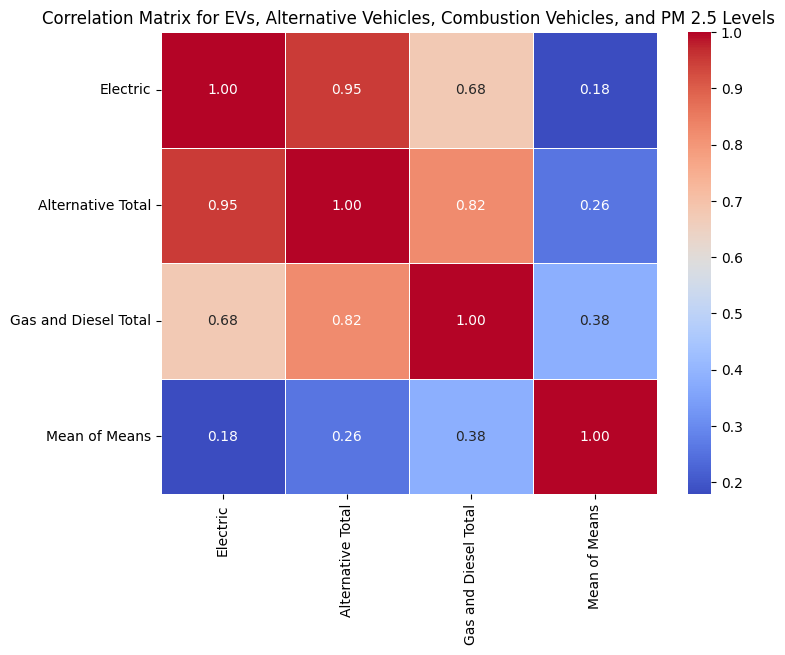

In [ ]:
correlation_df = df[['Electric', 'Alternative Total', 'Gas and Diesel Total', 'Mean of Means']]

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for EVs, Alternative Vehicles, Combustion Vehicles, and PM 2.5 Levels')
plt.show()

In [ ]:
import statsmodels.api as sm

My final analysis was a regression analysis where I again use the same variable and use the mean PM 2.5 field as my dependent variable. In the past I have done regression in R but never in python, so I used ChatGPT to help me find the statsmodels.api library.

In [ ]:
X = df[['Electric', 'Alternative Total', 'Gas and Diesel Total']]
Y = df['Mean of Means']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Mean of Means   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     24.61
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           1.27e-14
Time:                        17:56:33   Log-Likelihood:                -695.16
No. Observations:                 400   AIC:                             1398.
Df Residuals:                     396   BIC:                             1414.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.9392 

My final analysis showed that while Electric Vehicles and Alternative Vehicles are not statistically significant in explaining PM 2.5 levels in this model, Gas and Diesel Vehicles have a statistically significant positive effect on PM 2.5 levels, meaning that increases in combustion engine vehicles are associated with increases in PM 2.5 levels.

# Where to go after study

While my study found a correlation between emissions and PM2.5 levels, with a model accounting for 15.7% of the variance, it primarily focused on the relationship between vehicle emissions and air quality. A stronger connection was observed between combustion engines and elevated PM2.5 levels, but this model could benefit from incorporating additional variables. For instance, factors such as industrial emissions, population density, and regional variations in transportation infrastructure could provide a more comprehensive understanding of the sources and distribution of particulate matter. Furthermore, narrowing the scope to examine urban and rural areas separately could reveal more nuanced insights, as the sources and impacts of PM2.5 may differ between these settings. Future research that includes these variables would likely improve the model's predictive power and provide a clearer pathway for targeted policy interventions aimed at reducing exposure to harmful air pollutants.

# Sources

## Data

DOE EV - https://afdc.energy.gov/vehicle-registration?year=2023

EPA Emissions - https://aqs.epa.gov/aqsweb/airdata/download_files.html#Annual

## Works Cited

Ilenič, T., Pranjić, Z., Zupančič, I., Milačič, R., & Ščančar, J. (2024, February). Fine particulate matter (PM2.5) exposure assessment among active daily commuters. Science of the Total Environment, 883, 163539. https://doi.org/10.1016/j.scitotenv.2023.163539

McDuffie, E. E., Martin, R. V., Spadaro, J. V., Burnett, R., Smith, S. J., O’Rourke, P., Hammer, M. S., van Donkelaar, A., Bindle, L., Shah, V., Jaeglé, L., Luo, G., Yu, F., Adeniran, J. A., Lin, J., & Brauer, M. (2021). Source sector and fuel contributions to ambient PM2.5 and attributable mortality across multiple spatial scales. Environmental Research Letters, 16(6), 064026. https://doi.org/10.1088/1748-9326/abfbc2

Moseman, A., & Paltsev, S. (2022, October). Are electric vehicles definitely better for the climate than gas-powered cars? MIT Climate Portal. https://climate.mit.edu/ask-mit/are-electric-vehicles-definitely-better-climate-gas-powered-cars

Ritchie, H. (2024, April). Tracking global data on electric vehicles. Our World in Data. https://ourworldindata.org/electric-car-sales